In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from tqdm import tqdm_notebook
from sklearn.metrics import mean_squared_error

In [2]:
model = load_model('model1_waterflow.hdf5')

In [3]:
df = pd.read_csv('Sub0-RAW.csv')
df.head()

,Dates,Year,Month,Day,Hours,Precipitation,Temperature,Outflow
0,10/1/1980,1980,10,1,0:00:00,0.0,102.992,5.0
1,10/1/1980,1980,10,1,1:00:00,0.0,97.790,5.0
2,10/1/1980,1980,10,1,2:00:00,0.0,92.588,5.0
3,10/1/1980,1980,10,1,3:00:00,0.0,87.404,5.0
4,10/1/1980,1980,10,1,4:00:00,0.0,85.172,5.0


In [4]:
train_cols = ["Precipitation","Temperature","Outflow"]

In [5]:
new_df = df.filter(train_cols, axis=1)

In [6]:
def lag_seq(df, n_seq):
    for i in range(n_seq):
        df['Outflow(t+%d)' %(i+1)] = new_df['Outflow'].shift(-(i+1))
    return df

In [7]:
def timeseries(X, Y, Y_actual, time_steps, out_steps):
    input_size_0 = X.shape[0] - time_steps
    input_size_1 = X.shape[1]
    X_values = np.zeros((input_size_0, time_steps, input_size_1))
    Y_values = np.zeros((input_size_0,))
    Y_values_actual = np.zeros((input_size_0,))
    
    for i in tqdm_notebook(range(input_size_0)):
        X_values[i] = X[i:time_steps+i]
        Y_values[i] = Y[time_steps+i-1, 0]
        Y_values_actual[i] = Y_actual[time_steps+i-1, 0]
        
    print("length of time-series i/o",X_values.shape,Y_values.shape)
    return X_values, Y_values, Y_values_actual

In [8]:
lag_df = lag_seq(new_df, 1)
lag_df.dropna(inplace=True)
lag_df

,Precipitation,Temperature,Outflow,Outflow(t+1)
0,0.0,102.992,5.0,5.0
1,0.0,97.790,5.0,5.0
2,0.0,92.588,5.0,5.0
3,0.0,87.404,5.0,5.0
4,0.0,85.172,5.0,5.0
...,...,...,...,...
185538,0.0,52.880,29.0,30.0
185539,0.0,54.284,30.0,29.0
185540,0.0,55.670,29.0,29.0
185541,0.0,57.074,29.0,31.0


In [9]:
label_cols = ["Outflow(t+1)"]

In [10]:
#Splitting training and test data
df_train, df_test = train_test_split(lag_df, train_size=0.8, test_size=0.2, shuffle=False)
x_train = df_train.loc[:,train_cols].values
y_train = df_train.loc[:,label_cols].values
x_test = df_test.loc[:,train_cols].values
y_test = df_test.loc[:,label_cols].values

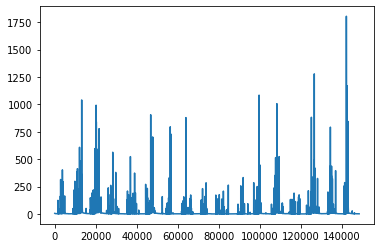

In [11]:
plt.figure()
plt.plot(y_train)
plt.show()

In [12]:
values_above_thres = []
labels_above_theres = []
threshold = 250
timesteps = 18

for i in range(timesteps, x_train.shape[0]):
    if (y_train[i] > threshold):
        values_above_thres.append(x_train[i-timesteps:i])
        labels_above_theres.append(y_train[i])

In [13]:
x_train.shape

(148434, 3)

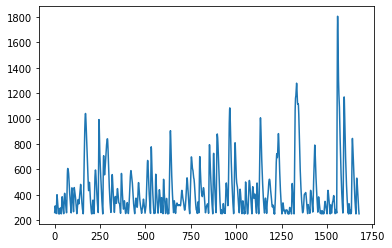

In [14]:
plt.figure()
plt.plot(labels_above_theres)
plt.show()

In [18]:
len(values_above_thres)

1678

In [19]:
values_above_thres

[array([[2.03925260e-02, 4.13780000e+01, 1.66000000e+02],
        [2.88894110e-02, 4.20260000e+01, 1.64000000e+02],
        [2.03925260e-02, 4.30160000e+01, 1.63000000e+02],
        [2.88894110e-02, 4.39880000e+01, 1.61000000e+02],
        [2.37912800e-02, 4.49600000e+01, 1.60000000e+02],
        [3.05887880e-02, 4.51760000e+01, 1.59000000e+02],
        [2.71900340e-02, 4.54100000e+01, 1.58000000e+02],
        [1.49435520e-02, 4.56440000e+01, 1.57000000e+02],
        [1.88760650e-02, 4.51580000e+01, 1.55000000e+02],
        [1.33705460e-02, 4.46720000e+01, 1.52000000e+02],
        [1.73030600e-02, 4.41860000e+01, 1.48000000e+02],
        [1.73030600e-02, 4.41860000e+01, 1.44000000e+02],
        [1.57300540e-02, 4.41860000e+01, 1.40000000e+02],
        [4.16846440e-02, 4.41860000e+01, 1.39000000e+02],
        [6.84257360e-02, 4.43840000e+01, 1.43000000e+02],
        [7.78637690e-02, 4.45820000e+01, 1.52000000e+02],
        [1.09323877e-01, 4.47800000e+01, 1.69000000e+02],
        [1.486

In [30]:
index_list = [] 
for i in range(len(lag_df)):
    if (lag_df["Outflow(t+1)"][i] > 250):
        index_list.append(i)

In [31]:
index_list

[2843,
 2844,
 2845,
 2846,
 2847,
 2848,
 2849,
 2850,
 2851,
 2852,
 3708,
 3709,
 3710,
 3711,
 3712,
 3713,
 3714,
 3715,
 3716,
 3717,
 3718,
 4068,
 4069,
 4070,
 4071,
 4072,
 4073,
 9795,
 9796,
 9797,
 9798,
 9799,
 9800,
 9801,
 9802,
 9803,
 9804,
 10905,
 10906,
 10907,
 10908,
 10909,
 10910,
 10911,
 10912,
 10913,
 10914,
 10915,
 10916,
 10917,
 11048,
 11049,
 11050,
 11051,
 11052,
 11053,
 11054,
 11055,
 11056,
 11057,
 11058,
 11059,
 11060,
 11061,
 11062,
 11063,
 12049,
 12050,
 12051,
 12052,
 12053,
 12054,
 12055,
 12056,
 12057,
 12058,
 12059,
 12060,
 12061,
 12062,
 12063,
 12064,
 12065,
 12066,
 12067,
 12068,
 12069,
 12070,
 12071,
 12072,
 12073,
 12074,
 12611,
 12612,
 12613,
 12614,
 12615,
 12616,
 12617,
 12618,
 12619,
 12620,
 12621,
 12622,
 12623,
 12754,
 12755,
 12756,
 12757,
 12758,
 12759,
 12760,
 12761,
 12762,
 12763,
 12764,
 12765,
 12766,
 12767,
 12768,
 12769,
 12770,
 12771,
 12776,
 12777,
 12778,
 12779,
 12780,
 12781,
 1278

In [23]:
len(index_list)

NameError: name 'index_list' is not defined

In [21]:
lag_df[3690:3720]


,Precipitation,Temperature,Outflow,Outflow(t+1)
3690,0.005241,58.856,27.0,27.0
3691,0.005241,61.304,27.0,28.0
3692,0.005241,63.752,28.0,28.0
3693,0.005241,66.200,28.0,29.0
3694,0.005241,66.722,29.0,29.0
3695,0.005241,67.226,29.0,29.0
3696,0.000000,67.748,29.0,29.0
3697,0.000000,63.248,29.0,28.0
3698,0.000000,58.766,28.0,26.0
3699,0.000000,54.266,26.0,25.0


In [82]:
values_above_thres_arr = np.array(values_above_thres)

In [83]:
labels_above_theres = np.array(labels_above_theres)

In [84]:
labels_above_theres

array([[262.],
       [290.],
       [309.],
       ...,
       [287.],
       [269.],
       [252.]])

In [86]:
values_above_thres[0].shape

(18, 3)

In [87]:
values_above_thres_arr[0].shape

(18, 3)

In [88]:
values_above_thres[1].shape

(18, 3)

In [89]:
values_above_thres_arr

array([[[2.88894110e-02, 4.20260000e+01, 1.64000000e+02],
        [2.03925260e-02, 4.30160000e+01, 1.63000000e+02],
        [2.88894110e-02, 4.39880000e+01, 1.61000000e+02],
        ...,
        [1.09323877e-01, 4.47800000e+01, 1.69000000e+02],
        [1.48649013e-01, 4.51940000e+01, 1.95000000e+02],
        [1.38424478e-01, 4.56080000e+01, 2.28000000e+02]],

       [[2.03925260e-02, 4.30160000e+01, 1.63000000e+02],
        [2.88894110e-02, 4.39880000e+01, 1.61000000e+02],
        [2.37912800e-02, 4.49600000e+01, 1.60000000e+02],
        ...,
        [1.48649013e-01, 4.51940000e+01, 1.95000000e+02],
        [1.38424478e-01, 4.56080000e+01, 2.28000000e+02],
        [1.17188904e-01, 4.60400000e+01, 2.62000000e+02]],

       [[2.88894110e-02, 4.39880000e+01, 1.61000000e+02],
        [2.37912800e-02, 4.49600000e+01, 1.60000000e+02],
        [3.05887880e-02, 4.51760000e+01, 1.59000000e+02],
        ...,
        [1.38424478e-01, 4.56080000e+01, 2.28000000e+02],
        [1.17188904e-01, 4.60

In [90]:
values_above_thres_arr.shape

(1678, 18, 3)

In [92]:
labels_above_theres.shape

(1678, 1)

In [93]:
a = np.array([[[1,2,3],
              [2,3,4]],
            [[7,8,4],
            [2,6,7]],
              [[1,9,8],
              [2,6,8]]])
a

array([[[1, 2, 3],
        [2, 3, 4]],

       [[7, 8, 4],
        [2, 6, 7]],

       [[1, 9, 8],
        [2, 6, 8]]])

In [94]:
a.shape

(3, 2, 3)

In [95]:
a_re = a.reshape((3,6))
a_re

array([[1, 2, 3, 2, 3, 4],
       [7, 8, 4, 2, 6, 7],
       [1, 9, 8, 2, 6, 8]])

In [96]:
a_re.reshape(3,2,3)

array([[[1, 2, 3],
        [2, 3, 4]],

       [[7, 8, 4],
        [2, 6, 7]],

       [[1, 9, 8],
        [2, 6, 8]]])

In [17]:
x= [0,1,2,3,4,5,6]
x[2:4]

[3, 4]